In [459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [460]:
import warnings

# Filter out warnings
warnings.filterwarnings("ignore")



In [461]:
data = pd.read_csv("bitcoin.csv")

In [462]:
data = pd.DataFrame(data)

In [463]:
data.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-05-22,2024-05-23,70144.69,70599.97,69048.60,69224.99,1.161000e+11,1.375970e+12
1,2024-05-21,2024-05-22,71369.73,71739.14,69266.38,70104.40,1.403673e+11,1.391372e+12
2,2024-05-20,2024-05-21,66222.45,71456.55,66139.62,71418.17,9.769064e+10,1.332128e+12
3,2024-05-19,2024-05-20,66972.63,67598.31,66005.33,66347.05,8.441685e+10,1.317072e+12
4,2024-05-18,2024-05-19,66939.82,67376.41,66640.01,66914.58,9.377570e+10,1.318743e+12


In [464]:
null_values = data.isnull()
null_counts = null_values.sum()
null_counts

Start         0
End           0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [465]:
data.describe()

,Open,High,Low,Close,Volume,Market Cap
count,5059.000000,5059.000000,5059.000000,5059.000000,5.059000e+03,5.059000e+03
mean,11438.181181,11705.263065,11158.414652,11452.970652,2.080825e+10,2.151543e+11
std,16844.549351,17238.667309,16427.120330,16866.242616,3.322006e+10,3.233431e+11
min,0.050000,0.050000,0.050000,0.050000,0.000000e+00,0.000000e+00
25%,229.495500,232.678500,226.067500,229.564000,6.455739e+06,3.272665e+09
50%,2506.470000,2581.910000,2412.940000,2517.590000,1.040786e+09,4.145427e+10
75%,16723.683846,16981.321350,16480.847042,16762.880195,3.342707e+10,3.194169e+11
max,72961.030000,73628.430000,71333.360000,73087.950000,2.121515e+11,1.428493e+12


In [466]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059 entries, 0 to 5058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       5059 non-null   object 
 1   End         5059 non-null   object 
 2   Open        5059 non-null   float64
 3   High        5059 non-null   float64
 4   Low         5059 non-null   float64
 5   Close       5059 non-null   float64
 6   Volume      5059 non-null   float64
 7   Market Cap  5059 non-null   float64
dtypes: float64(6), object(2)
memory usage: 316.3+ KB


In [467]:
data.drop(columns = ['Open','High','Low','Volume','Market Cap'], inplace=True)

In [468]:
data

,Start,End,Close
0,2024-05-22,2024-05-23,69224.9900
1,2024-05-21,2024-05-22,70104.4000
2,2024-05-20,2024-05-21,71418.1700
3,2024-05-19,2024-05-20,66347.0500
4,2024-05-18,2024-05-19,66914.5800
...,...,...,...
5054,2010-07-21,2010-07-22,0.0792
5055,2010-07-20,2010-07-21,0.0747
5056,2010-07-19,2010-07-20,0.0808
5057,2010-07-18,2010-07-19,0.0858


In [469]:
data_reversed = data.iloc[::-1].reset_index(drop=True)
data=data_reversed

In [470]:
data

,Start,End,Close
0,2010-07-17,2010-07-18,0.0500
1,2010-07-18,2010-07-19,0.0858
2,2010-07-19,2010-07-20,0.0808
3,2010-07-20,2010-07-21,0.0747
4,2010-07-21,2010-07-22,0.0792
...,...,...,...
5054,2024-05-18,2024-05-19,66914.5800
5055,2024-05-19,2024-05-20,66347.0500
5056,2024-05-20,2024-05-21,71418.1700
5057,2024-05-21,2024-05-22,70104.4000


In [471]:
data.drop(columns = ['End','Start'], inplace=True)

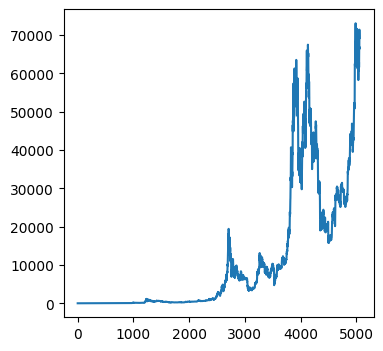

In [472]:
# Plot the data
plt.figure(figsize=(4, 4))
plt.plot(data)
plt.show()

In [473]:

data = data.iloc[1804:].reset_index(drop=True)

In [474]:
data

,Close
0,242.694
1,243.599
2,251.083
3,248.987
4,257.022
...,...
3250,66914.580
3251,66347.050
3252,71418.170
3253,70104.400


In [475]:
data.shape

(3255, 1)

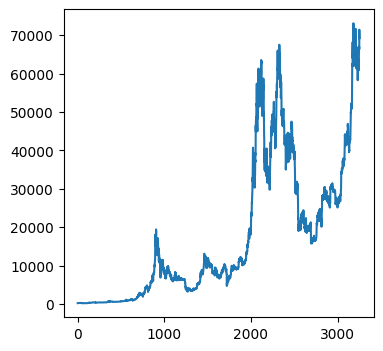

In [476]:
# Plot the data
plt.figure(figsize=(4, 4))
plt.plot(data)
plt.show()

In [477]:
train_data = data[:-500]
test_data = data[-500:]

In [478]:
train_data.shape

(2755, 1)

In [479]:
test_data.shape

(500, 1)

In [480]:
from sklearn.preprocessing import MinMaxScaler

train_values = train_data['Close'].values.reshape(-1, 1)
test_values = test_data['Close'].values.reshape(-1, 1)

# Initialize MinMaxScaler
scaler = MinMaxScaler()


train_values_scaled = scaler.fit_transform(train_values)
test_values_scaled = scaler.transform(test_values)

train_data['Close_scaled'] = train_values_scaled
test_data['Close_scaled'] = test_values_scaled


In [481]:
train_values_scaled.shape

(2755, 1)

In [482]:
test_values_scaled.shape


(500, 1)

In [497]:

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq_end = i + seq_length
        X.append(data[i:seq_end])
        y.append(data[seq_end])
    return np.array(X), np.array(y)

seq_length = 40

# Create sequences for training and testing sets
X_train, y_train = create_sequences(train_values_scaled, seq_length)
X_test, y_test = create_sequences(test_values_scaled, seq_length)

# Reshape X_train and X_test to be 3-dimensional (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], seq_length, 1)
X_test = X_test.reshape(X_test.shape[0], seq_length, 1)



In [498]:
X_train.shape

(2715, 40, 1)

In [499]:
X_test.shape

(460, 40, 1)

In [500]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [501]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [502]:
# Train the model
history =model.fit(X_train, y_train, epochs = 25, verbose =1 )


Epoch 1/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0340
Epoch 2/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0053
Epoch 3/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0051
Epoch 4/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0050
Epoch 5/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0041
Epoch 6/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0040
Epoch 7/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0039
Epoch 8/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0040
Epoch 9/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0033
Epoch 10/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0036
Epoch 11/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0039
Epoch 12/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0030
Epoch 13/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0030
Epoch 14/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0025
Epoch 15/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0032


In [503]:
# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011  
Test Loss: 0.0016309699276462197


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Mean Squared Error (MSE): 0.0016309698253598767
Mean Absolute Error (MAE): 0.03150271658625381


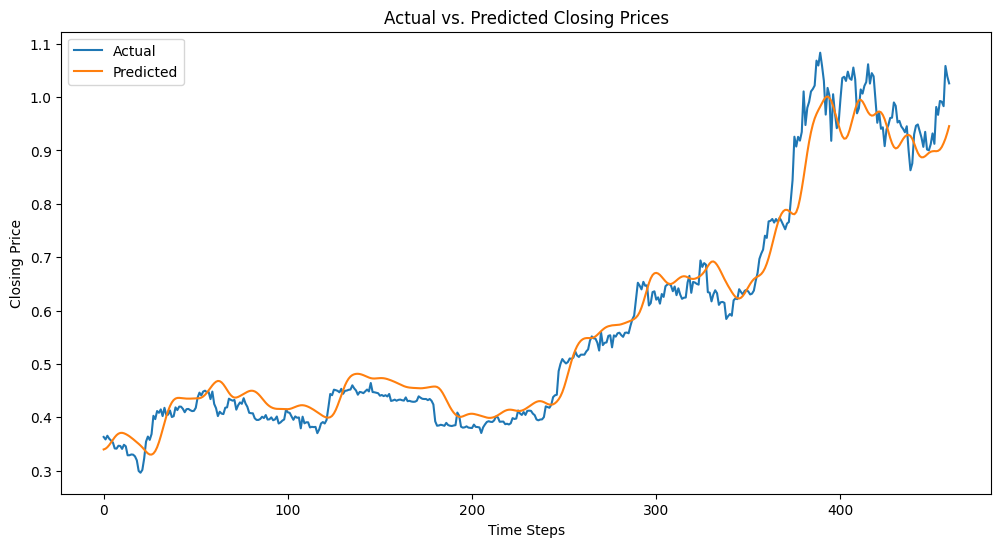

In [504]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming predictions and y_test are already defined
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Visualize actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs. Predicted Closing Prices')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [505]:

future_predictions = []

initial_input = X_test[-1]

num_future_days = 30


current_input = initial_input

for _ in range(num_future_days):

    current_input = current_input.reshape(1, seq_length, 1)
    
  
    next_pred = model.predict(current_input)
    
    future_predictions.append(next_pred[0, 0]) 
    
   
    current_input = np.roll(current_input, -1, axis=1)  
    current_input[0, -1, 0] = next_pred 

future_predictions = np.array(future_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

In [506]:
future_predictions

array([0.94549924, 0.95646673, 0.9638509 , 0.9668608 , 0.96572095,
       0.9612842 , 0.9545905 , 0.9466678 , 0.93831444, 0.93008995,
       0.9223186 , 0.9151602 , 0.90861785, 0.9026507 , 0.897215  ,
       0.8922687 , 0.8877346 , 0.88354355, 0.8796538 , 0.8760208 ,
       0.8726247 , 0.8694811 , 0.8665694 , 0.8638676 , 0.8613627 ,
       0.8590441 , 0.8568914 , 0.85489506, 0.8530482 , 0.8513123 ],
      dtype=float32)

In [507]:
future_predictions.shape

(30,)

In [508]:
y_test.shape

(460, 1)

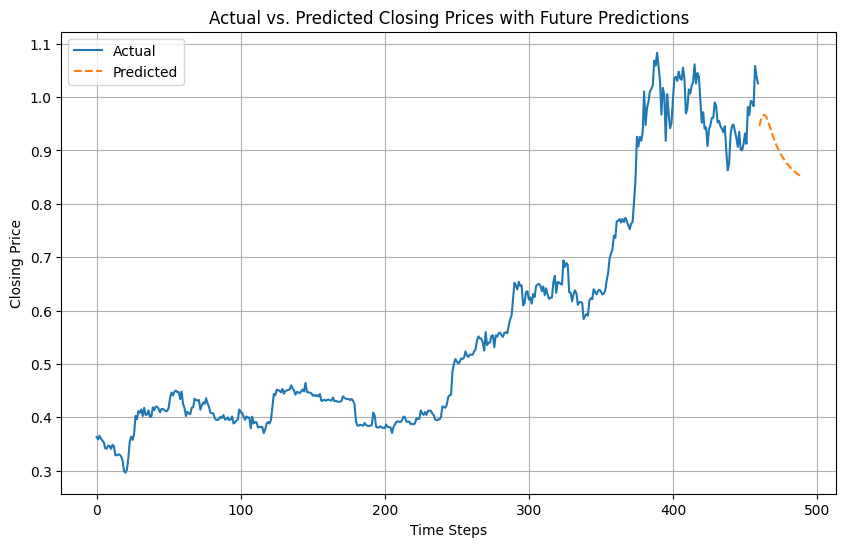

In [509]:
import numpy as np
import matplotlib.pyplot as plt

future_predictions = future_predictions.reshape(-1, 1)


time_indices = np.arange(len(y_test) + len(future_predictions))

extended_y_test = np.concatenate((y_test, future_predictions))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_indices[:len(y_test)], y_test, label='Actual')
plt.plot(time_indices[len(y_test):], future_predictions, label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Closing Prices with Future Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


In [510]:
model.save('Bitcoin.keras')